<a href="https://colab.research.google.com/github/aqualytics/INFT6201-Assignment3/blob/main/INFT6201_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
#!pip install --upgrade matplotlib

In [128]:
# Load packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf

In [129]:
# Load data
# ny = pd.read_csv('ny_accidents.csv')

In [130]:
# Import data for Google Collab. Remove before submission
url = 'https://raw.githubusercontent.com/aqualytics/INFT6201-Assignment3/main/ny_accidents.csv?token=GHSAT0AAAAAABZNNFLGDHXVZMJZZRLCVUMQYZXUG3Q'
ny = pd.read_csv(url)

In [131]:
# Convert dates & times to datetime
cols = ['Start_Time','End_Time','Weather_Timestamp']
ny[cols] = ny[cols].apply(pd.to_datetime, errors='coerce')

# Rename columns
ny.rename(columns = {'Distance.mi.':'Distance','Wind_Speed.mph.':'Wind_Speed', 'Temperature.F.':'Temperature','Wind_Chill.F.':'Wind_Chill','Humidity...':'Humidity','Pressure.in.':'Pressure','Visibility.mi.':'Visibility','Precipitation.in.':'Precipitation'}, inplace=True)

# Add severity_cat column
conditions  = [ ny['Severity'] == 1, ny['Severity'] == 2, ny['Severity'] == 3, ny['Severity'] == 4 ]
choices     = [ 'Short', 'Medium-Short','Medium-Long', 'Long']
ny['severitycat'] = np.select(conditions, choices, default=np.nan)

# List variables and data types
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39537 entries, 0 to 39536
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             39537 non-null  int64         
 1   ID                     39537 non-null  object        
 2   Severity               39537 non-null  int64         
 3   Start_Time             39537 non-null  datetime64[ns]
 4   End_Time               39537 non-null  datetime64[ns]
 5   Start_Lat              39537 non-null  float64       
 6   Start_Lng              39537 non-null  float64       
 7   End_Lat                39537 non-null  float64       
 8   End_Lng                39537 non-null  float64       
 9   Distance               39537 non-null  float64       
 10  Description            39537 non-null  object        
 11  Number                 11845 non-null  float64       
 12  Street                 39537 non-null  object        
 13  S

In [132]:
# Describe the data
ny.describe()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance,Number,Temperature,Wind_Chill,Humidity,Pressure,Visibility,Wind_Speed,Precipitation
count,3.953700e+04,39537.000000,39537.000000,39537.000000,39537.000000,39537.000000,39537.000000,11845.000000,39147.000000,38074.000000,39137.000000,39162.000000,39131.000000,38349.000000,37594.000000
mean,7.543609e+05,2.282900,41.714567,-74.806364,41.715110,-74.806824,0.654307,2133.770030,51.915442,49.177806,65.716253,29.713701,9.040011,9.132535,0.005389
std,3.307301e+05,0.642619,1.065492,1.685198,1.065188,1.685823,1.551176,3428.535678,16.787521,19.667776,20.599997,0.399174,2.668705,5.870588,0.027952
min,2.373510e+05,1.000000,40.523980,-79.748951,40.524638,-79.761920,0.000000,1.000000,-12.000000,-30.400000,13.000000,27.550000,0.000000,0.000000,0.000000
25%,4.998200e+05,2.000000,40.772600,-76.049410,40.774311,-76.047636,0.000000,215.000000,39.900000,34.000000,49.000000,29.470000,10.000000,5.000000,0.000000
50%,7.266940e+05,2.000000,41.065783,-73.929060,41.068520,-73.929030,0.192000,857.000000,51.000000,51.000000,67.000000,29.740000,10.000000,8.000000,0.000000
75%,9.178200e+05,2.000000,42.989290,-73.781207,42.987950,-73.781337,0.687000,2451.000000,65.000000,65.000000,84.000000,29.990000,10.000000,13.000000,0.000000
max,1.515693e+06,4.000000,44.917460,-71.943680,44.981057,-71.943680,49.240000,52027.000000,96.000000,96.000000,100.000000,30.710000,20.000000,40.000000,0.830000


Text(0.5, 1.0, 'Correlation Heatmap')

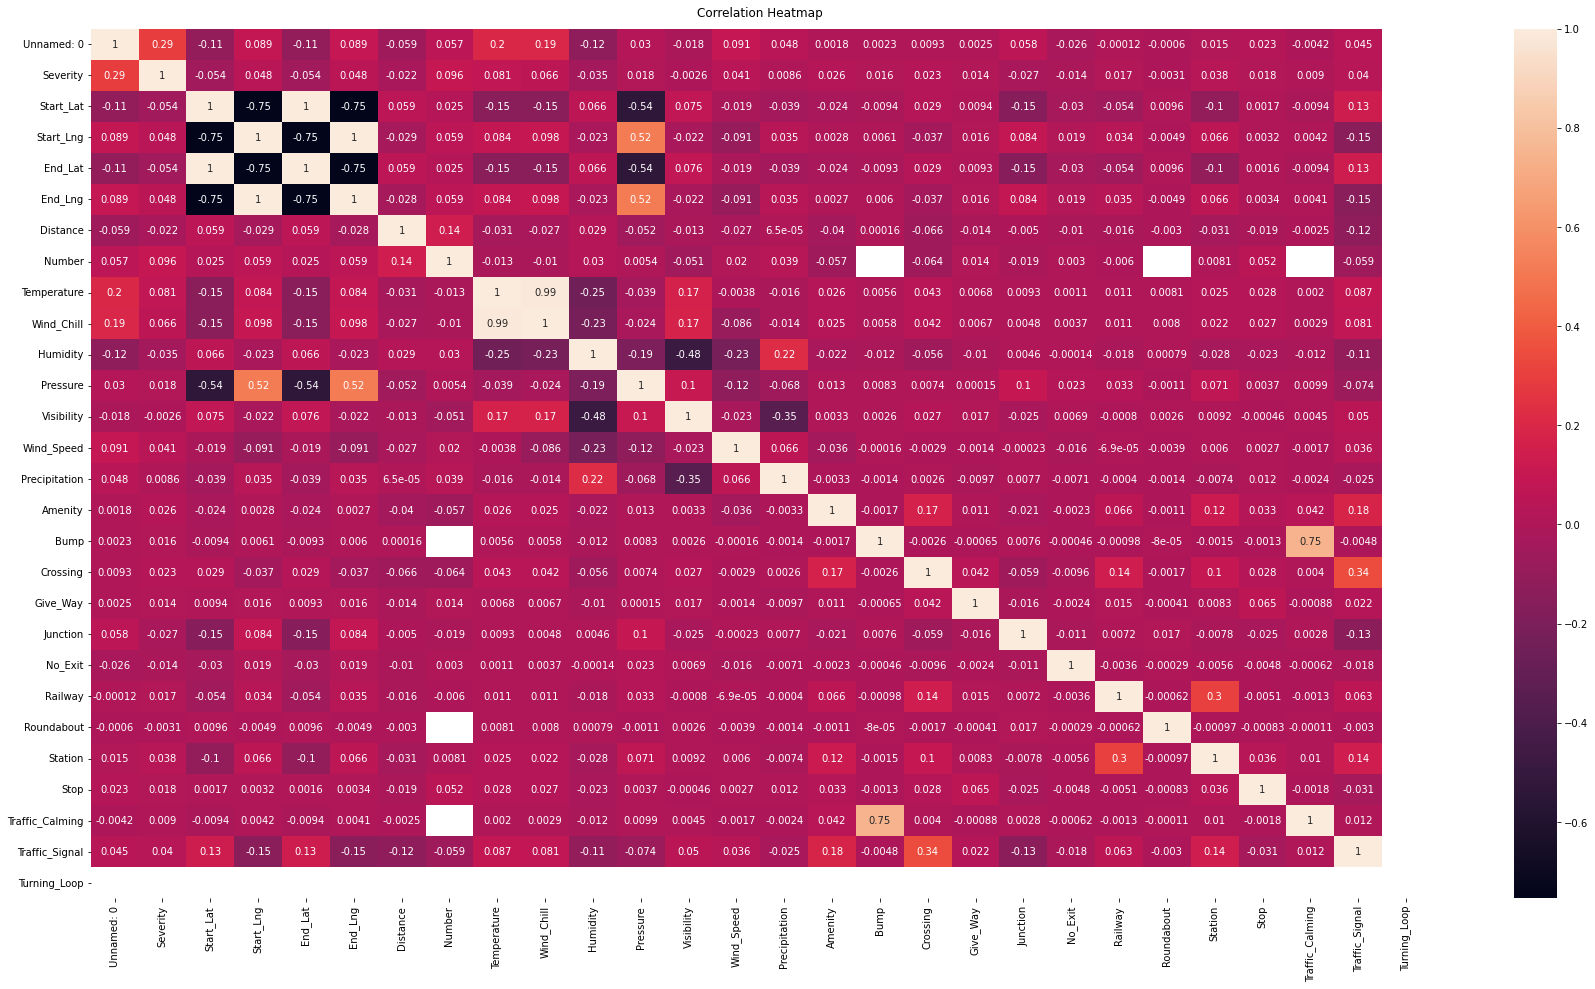

In [133]:
# Correlation heatmap of all variables
#plt.figure(figsize=(16, 16))
plt.rcParams['figure.figsize']=(30,16)
heatmap = sns.heatmap(ny.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


[Text(0, 10, '6251'),
 Text(0, 10, '6423'),
 Text(0, 10, '6224'),
 Text(0, 10, '7144'),
 Text(0, 10, '6523'),
 Text(0, 10, '3644'),
 Text(0, 10, '3328')]

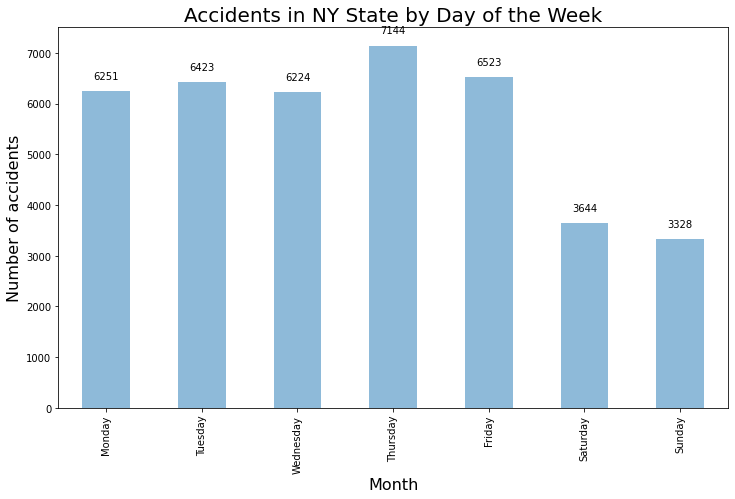

In [134]:
# Accident time
import calendar

# Number of accident per day of the week
accidents_day = ny.groupby(ny['Start_Time'].dt.dayofweek).count().Start_Time

# Replace the day integers by day names.
accidents_day.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
fig, ax = plt.subplots()
ax = accidents_day.plot(kind='bar',figsize=(12,7), alpha=0.5)
ax.set_title('Accidents in NY State by Day of the Week', fontsize=20)
ax.set_xlabel('Month',fontsize=16)
ax.set_ylabel('Number of accidents',fontsize=16)
ax.bar_label(ax.containers[0], label_type='edge', padding=10)



[Text(0, 10, '1037'),
 Text(0, 10, '1576'),
 Text(0, 10, '2322'),
 Text(0, 10, '4301'),
 Text(0, 10, '4083'),
 Text(0, 10, '4262'),
 Text(0, 10, '763'),
 Text(0, 10, '596'),
 Text(0, 10, '3117'),
 Text(0, 10, '4842'),
 Text(0, 10, '5872'),
 Text(0, 10, '6766')]

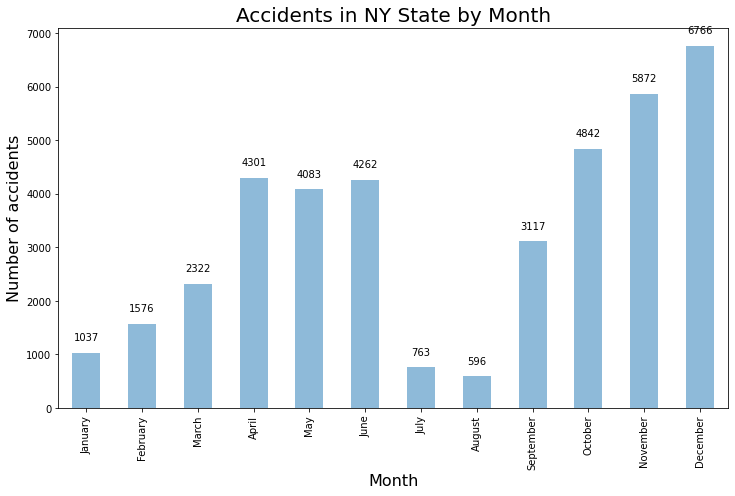

In [135]:
# Number of accident per month
accidents_month = ny.groupby(ny['Start_Time'].dt.month).count().Start_Time

# Replace the month integers by month names.
accidents_month.index=[calendar.month_name[x] for x in range(1,13)]

# plot accidents per month
fig, ax = plt.subplots()
ax = accidents_month.plot(kind='bar',figsize=(12,7), alpha=0.5)
ax.set_title('Accidents in NY State by Month', fontsize=20)
ax.set_xlabel('Month',fontsize=16)
ax.set_ylabel('Number of accidents',fontsize=16)
ax.bar_label(ax.containers[0], label_type='edge', padding=10)

[Text(0, 10, '1566'),
 Text(0, 10, '1416'),
 Text(0, 10, '1126'),
 Text(0, 10, '942'),
 Text(0, 10, '934'),
 Text(0, 10, '1143'),
 Text(0, 10, '1608'),
 Text(0, 10, '1520'),
 Text(0, 10, '1554'),
 Text(0, 10, '1356'),
 Text(0, 10, '1243'),
 Text(0, 10, '1341'),
 Text(0, 10, '1822'),
 Text(0, 10, '2245'),
 Text(0, 10, '2467'),
 Text(0, 10, '2663'),
 Text(0, 10, '2710'),
 Text(0, 10, '2628'),
 Text(0, 10, '1962'),
 Text(0, 10, '1600'),
 Text(0, 10, '1519'),
 Text(0, 10, '1381'),
 Text(0, 10, '1359'),
 Text(0, 10, '1432')]

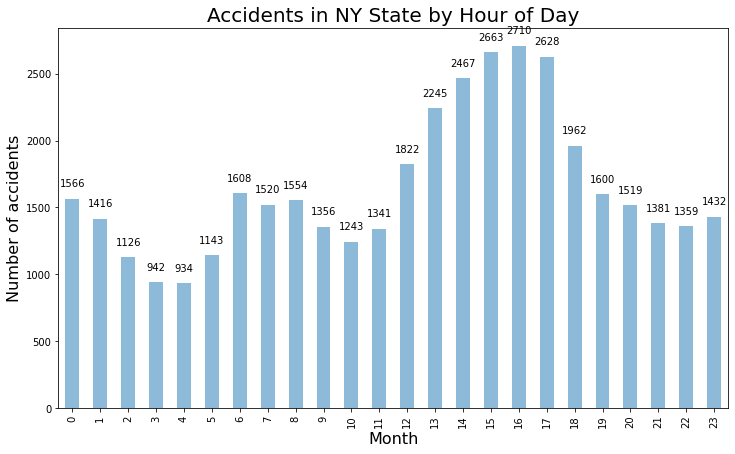

In [136]:
# Number of accident per hour
accidents_hour = ny.groupby(ny['Start_Time'].dt.hour).count().Start_Time

# plot accidents per hour
fig, ax = plt.subplots()
ax = accidents_hour.plot(kind='bar',figsize=(12,7), alpha=0.5)
ax.set_title('Accidents in NY State by Hour of Day', fontsize=20)
ax.set_xlabel('Month',fontsize=16)
ax.set_ylabel('Number of accidents',fontsize=16)
ax.bar_label(ax.containers[0], label_type='edge', padding=10)

In [137]:
# Accident location
# Geographic location


In [138]:
# Mean of weather data grouped by road traffic severity
weather = ['severitycat','Distance','Temperature','Wind_Chill','Humidity','Pressure','Visibility','Wind_Direction','Wind_Speed','Precipitation']
display(ny[weather].groupby(['severitycat']).agg(['count','mean','std']))

Distance                     Temperature                        \
                count      mean       std       count       mean        std   
severitycat                                                                   
Long             3449  0.862456  1.693970        3430  53.041516  18.599234   
Medium-Long      4991  0.266108  0.875308        4970  58.480201  16.107971   
Medium-Short    30393  0.682239  1.560243       30049  50.495551  16.370812   
Short             704  1.180817  2.995157         698  60.765043  15.613677   

             Wind_Chill                       Humidity  ...  Pressure  \
                  count       mean        std    count  ...       std   
severitycat                                             ...             
Long               3224  50.049380  22.019429     3427  ...  0.471224   
Medium-Long        4666  56.242199  18.752152     4970  ...  0.382080   
Medium-Short      29489  47.728492  19.263474    30042  ...  0.393237   
Short               695  59.201439  17.593710      698  ...  0.339060   

             Visibility                     Wind_Speed                       \
                  count      mean       std      count       mean       std   
severitycat                                                                   
Long               3424  9.071492  2.651683       3263   9.074287  5.840844   
Medium-Long        4971  9.048244  2.514300       4724  10.496888  5.697126   
Medium-Short      30038  9.020634  2.695147      29667   8.916031  5.875129   
Short               698  9.660817  2.604663        695   9.374101  5.733859   

             Precipitation                      
                     count      mean       std  
severitycat                                     
Long                  3114  0.005193  0.024943  
Medium-Long           4729  0.006811  0.033560  
Medium-Short         29052  0.005185  0.027422  
Short                  699  0.005093  0.019034  

[4 rows x 24 columns]

Text(0.5, 1.0, 'Correlation Heatmap')

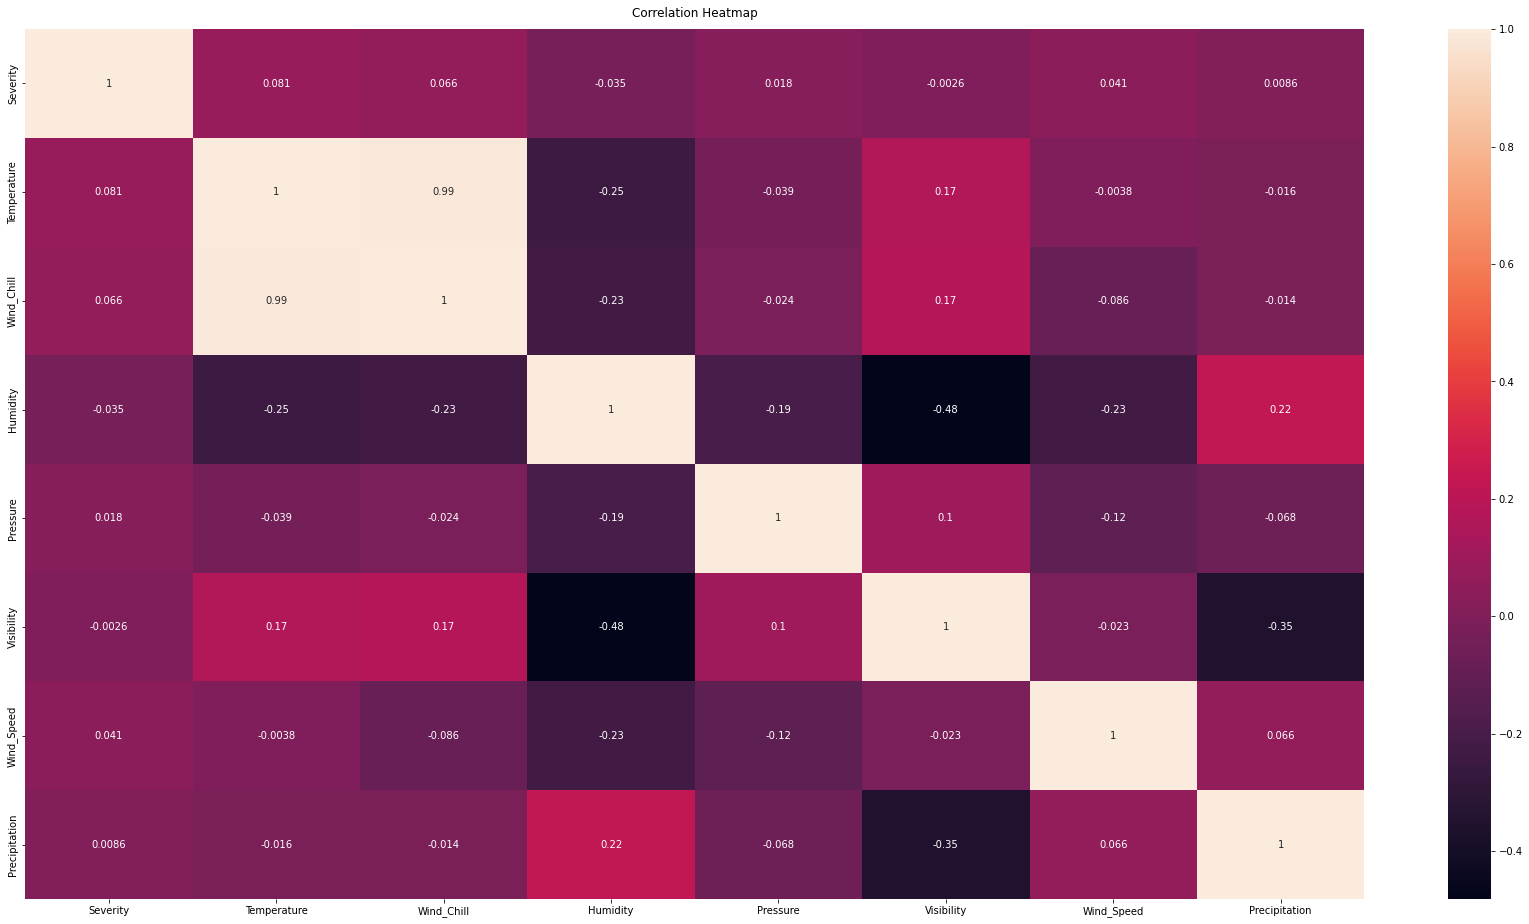

In [139]:
# Correlation heatmap of weather variables
weather = ['Severity','Temperature','Wind_Chill','Humidity','Pressure','Visibility','Wind_Direction','Wind_Speed','Precipitation']

plt.rcParams['figure.figsize']=(30,16)
heatmap = sns.heatmap(ny[weather].corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlation Heatmap')

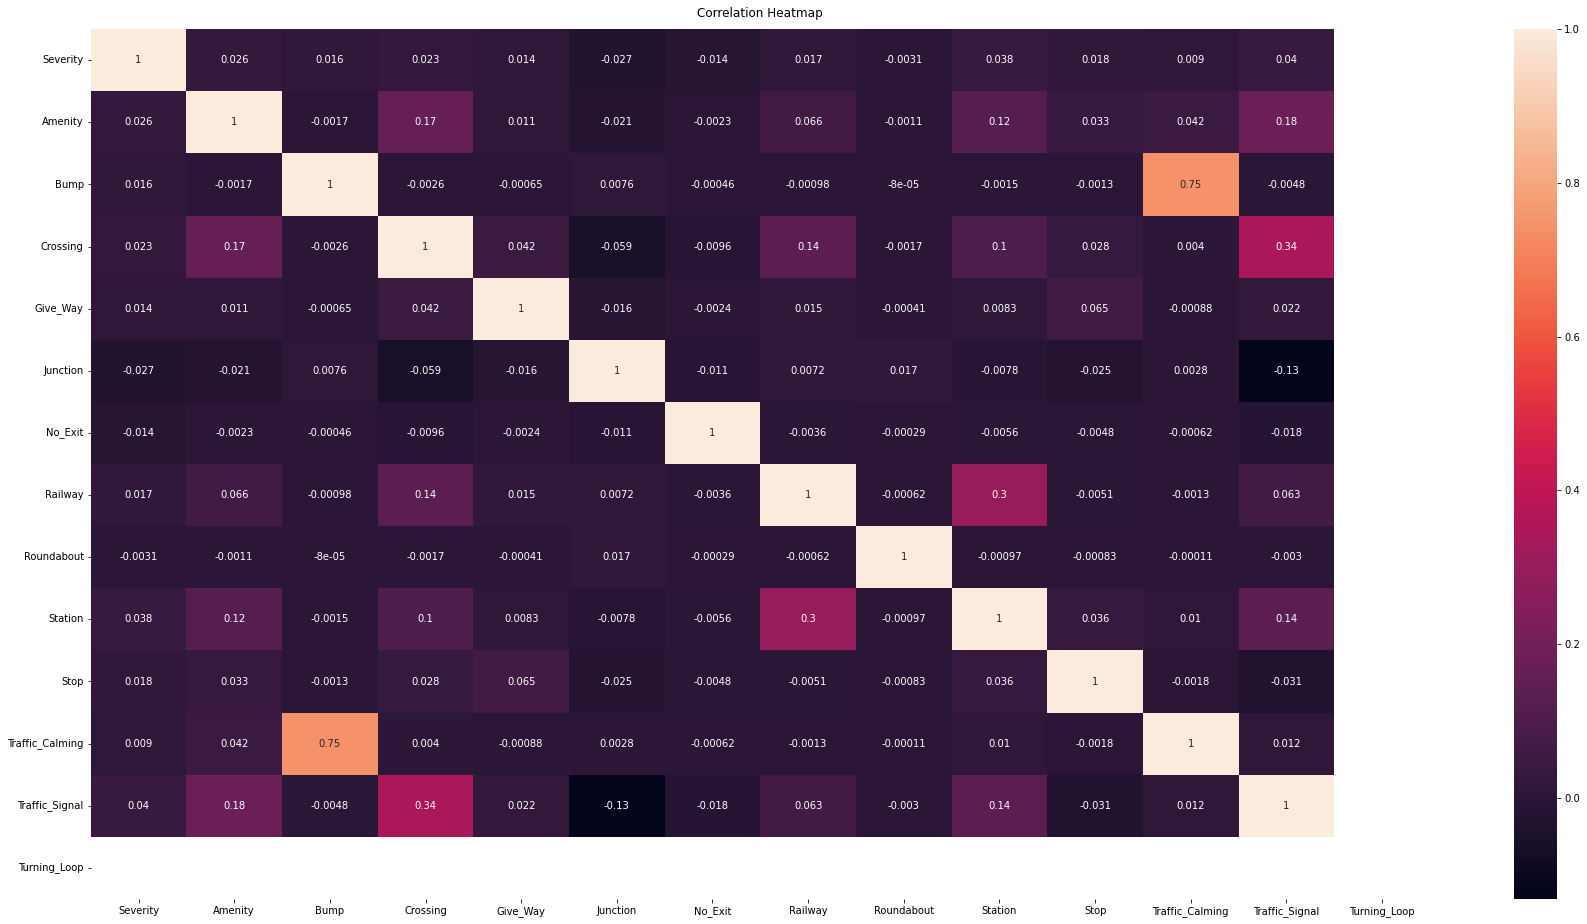

In [140]:
# Correlation heatmap of road features
features = ['Severity','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']

plt.rcParams['figure.figsize']=(30,16)
heatmap = sns.heatmap(ny[features].corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [142]:
# Multiple linear regression of weather variables
lin_1 = smf.ols(formula='Severity ~ Temperature + Wind_Chill + Humidity + Pressure + Visibility + Wind_Direction + Wind_Speed + Precipitation', data=ny).fit()
lin_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     21.86
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          7.07e-114
Time:                        22:32:06   Log-Likelihood:                -34674.
No. Observations:               36788   AIC:                         6.941e+04
Df Residuals:                   36758   BIC:                         6.966e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.9441      0.270     10.922      0.000       2.416       3.472
Wind_Direction[T.Calm]      3.942e-14   8.72e-15      4.522      0.000    2.23e-14    5.65e-14
Wind_Direction[T.E]            0.0274      0.021      1.331      0.183      -0.013       0.068
Wind_Direction[T.ENE]          0.0305      0.021      1.442      0.149      -0.011       0.072
Wind_Direction[T.ESE]         -0.0090      0.024     -0.370      0.711      -0.057       0.039
Wind_Direction[T.East]         0.1867      0.092      2.040      0.041       0.007       0.366
Wind_Direction[T.N]           -0.0130      0.019     -0.688      0.491      -0.050       0.024
Wind_Direction[T.NE]           0.0462      0.019      2.397      0.017       0.008       0.084
Wind_Direction[T.NNE]          0.0098      0.021      0.459      0.646      -0.032       0.051
Wind_Direction[T.NNW]         -0.0048      0.020     -0.245      0.806      -0.044       0.034
Wind_Direction[T.NW]          -0.0104      0.019     -0.558      0.577      -0.047       0.026
Wind_Direction[T.North]        0.3186      0.136      2.335      0.020       0.051       0.586
Wind_Direction[T.S]           -0.0083      0.017     -0.489      0.625      -0.042       0.025
Wind_Direction[T.SE]          -0.0161      0.023     -0.691      0.489      -0.062       0.029
Wind_Direction[T.SSE]         -0.0491      0.020     -2.439      0.015      -0.089      -0.010
Wind_Direction[T.SSW]         -0.0549      0.019     -2.880      0.004      -0.092      -0.018
Wind_Direction[T.SW]          -0.0812      0.018     -4.487      0.000      -0.117      -0.046
Wind_Direction[T.South]        0.2731      0.133      2.049      0.040       0.012       0.534
Wind_Direction[T.VAR]         -0.0880      0.017     -5.104      0.000      -0.122      -0.054
Wind_Direction[T.Variable]     0.1190      0.207      0.573      0.566      -0.288       0.526
Wind_Direction[T.W]           -0.0617      0.017     -3.717      0.000      -0.094      -0.029
Wind_Direction[T.WNW]         -0.0475      0.018     -2.640      0.008      -0.083      -0.012
Wind_Direction[T.WSW]         -0.0640      0.019     -3.327      0.001      -0.102      -0.026
Wind_Direction[T.West]         0.6220      0.110      5.655      0.000       0.406       0.838
Temperature                    0.0042      0.002      2.396      0.017       0.001       0.008
Wind_Chill                 -2.221e-05      0.001     -0.015      0.988      -0.003       0.003
Humidity                      -0.0007      0.000     -3.197      0.001      -0.001      -0.000
Pressure                      -0.0278      0.009     -3.152      0.002      -0.045      -0.011
Visibility                    -0.0039      0.001     -2.590      0.010      -0.007      -0.001
Wind_Speed                     0.0035      

In [143]:
# Multiple linear regression of road features
lin_2 = smf.ols(formula='Severity ~ Amenity + Bump + Crossing + Give_Way + Junction + No_Exit + Railway + Roundabout + Station + Stop + Traffic_Calming + Traffic_Signal + Turning_Loop', data=ny).fit()
lin_2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     14.42
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           1.38e-30
Time:                        22:33:48   Log-Likelihood:                -38530.
No. Observations:               39537   AIC:                         7.709e+04
Df Residuals:                   39524   BIC:                         7.720e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.2751      0.004    582.947      0.000       2.267       2.283
Amenity[T.True]             0.0669      0.022      3.040      0.002       0.024       0.110
Bump[T.True]                1.3708      0.431      3.182      0.001       0.526       2.215
Crossing[T.True]            0.0136      0.016      0.866      0.387      -0.017       0.045
Give_Way[T.True]            0.1232      0.056      2.204      0.028       0.014       0.233
Junction[T.True]           -0.0402      0.009     -4.473      0.000      -0.058      -0.023
No_Exit[T.True]            -0.2140      0.078     -2.728      0.006      -0.368      -0.060
Railway[T.True]             0.0355      0.039      0.900      0.368      -0.042       0.113
Roundabout[T.True]         -0.2349      0.454     -0.518      0.605      -1.124       0.654
Station[T.True]             0.1389      0.025      5.450      0.000       0.089       0.189
Stop[T.True]                0.0891      0.028      3.177      0.001       0.034       0.144
Traffic_Calming[T.True]    -0.4298      0.321     -1.337      0.181      -1.060       0.200
Traffic_Signal[T.True]      0.0497      0.010      5.105      0.000       0.031       0.069
Turning_Loop[T.True]             0          0        nan        nan           0           0
==============================================================================
Omnibus:                    10877.904   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23656.501
Skew:                           1.624   Prob(JB):                         0.00
Kurtosis:                       4.953   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""